In [85]:

from multiprocessing import Pool
from functools import partial
from itertools import repeat

import pandas as pd
from wordfreq import word_frequency

import sys
sys.path.append('../src')


from ankimaker.tasks.epub.load_epub import generate_corpus_from_epub_file
from ankimaker.tasks.dictionary import get_word_definitions_from_dictionary




In [86]:


file = '/home/gabriel/dev/ankimaker/data/german-epub.epub'

words_from_epub = generate_corpus_from_epub_file(file, 'german')

TypeError: generate_corpus_from_epub_file() takes 1 positional argument but 2 were given

In [ ]:
words_from_epub = pd.Series(words_from_epub)

In [ ]:
words_from_epub.value_counts()

momo               811
mehr               299
sagte              246
ja                 236
zeit               229
                  ... 
ansehen              1
stillschweigend      1
liebhast             1
liebhaben            1
hinkte               1
Length: 7785, dtype: int64

In [ ]:
pd.Series(words_from_epub.unique()).apply(lambda x: word_frequency(x, 'de'))

0       1.200000e-04
1       4.680000e-04
2       1.510000e-06
3       2.690000e-05
4       1.740000e-04
            ...     
7780    1.230000e-07
7781    1.580000e-06
7782    1.230000e-05
7783    3.720000e-04
7784    1.820000e-07
Length: 7785, dtype: float64

In [ ]:
df = (
    words_from_epub
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={'index': 'word', 0: 'epub_freq'})
)



In [ ]:
df['global_frequencies'] = df.word.apply(lambda x: word_frequency(x, 'de'))

In [ ]:
df.epub_freq = df.epub_freq / df.epub_freq.sum()

In [ ]:
df['epub_rank'] = df.epub_freq.rank(method='min')

<Axes: >

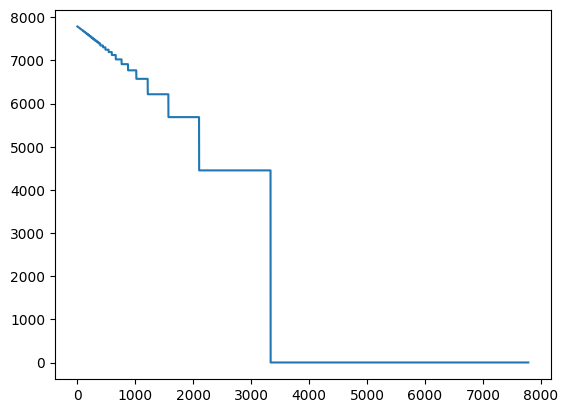

In [ ]:
df.epub_rank.plot()

In [ ]:
df['global_rank'] = df.global_frequencies.rank(method='min')

<Axes: >

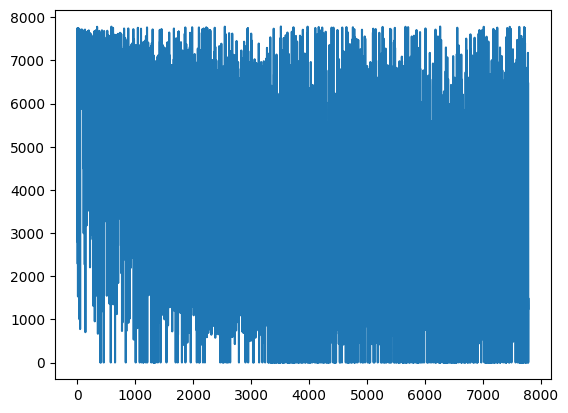

In [ ]:
df.global_rank.plot()

In [ ]:
df['rank_diff'] = df.epub_rank - df.global_rank

<Axes: >

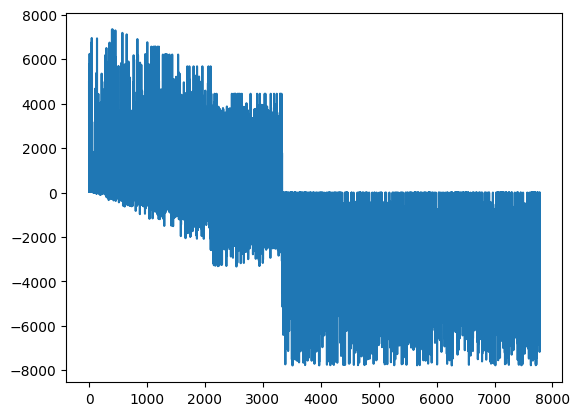

In [ ]:
df.rank_diff.plot()

In [ ]:
df['epub_rank_is_greater'] = df.epub_rank > df.global_rank

<Axes: >

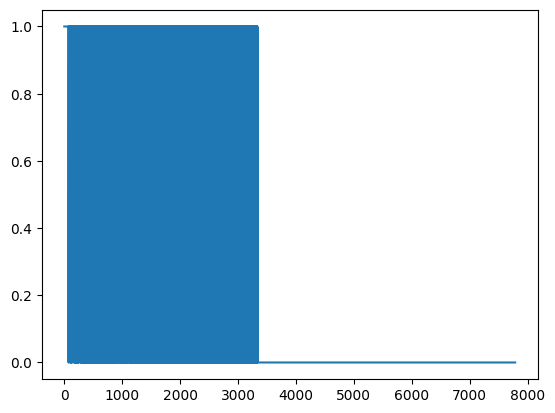

In [ ]:
(df.epub_rank_is_greater * 1).plot(style=dict( linestyle='--ob'))